In [2]:
import pandas as pd
import numpy as np

### Load file dữ liệu

In [22]:
# Read three CSV files into separate DataFrames
course_NumUser = pd.read_csv('course_NumUser.csv')
course_completion_rate = pd.read_csv('course_completion_rate.csv')
Course_num_resources = pd.read_csv('Course_num_resources.csv')
label_comment = pd.read_csv('label_comment.csv')
course_rank = pd.read_csv('course_teacher_rank.csv')

In [3]:
course_NumUser.head()

,id,name,num_users
0,C_584313,"introduction to ""zi zhi tong jian""",3
1,C_584329,calculus - limit theory and functions of one v...,6
2,C_584381,photojournalism,5
3,C_597208,data mining: theory and algorithms,10
4,C_597225,university computer,8


In [4]:
course_completion_rate.head()

,Unnamed: 0,course_id,average_completion_rate
0,0,C_676937,0.562500
1,1,C_1898449,0.705882
2,2,C_1907852,0.784090
3,3,C_1767581,0.938438
4,4,C_1771164,0.675000


In [5]:
Course_num_resources.head()

,id,number of resources
0,C_584313,91
1,C_584329,170
2,C_584381,127
3,C_597208,125
4,C_597225,165


In [6]:
label_comment.head()

,course_id,total_cmt,positive,negative,neutral
0,C_1011639,5.0,0.0,0.0,5.0
1,C_1017355,738.0,220.0,39.0,479.0
2,C_1017419,97.0,77.0,0.0,20.0
3,C_1025064,92.0,16.0,1.0,75.0
4,C_1025076,3.0,3.0,0.0,0.0


In [5]:
course_rank.head()

,course_id,rank
0,C_375629,23
1,C_425434,23
2,C_445639,23
3,C_445639,23
4,C_676649,23


## Gộp các file thuộc tính đã tính toán

In [26]:
import pandas as pd

# Step 1: Merge course_NumUser with label_comment on 'id' and 'course_id'
merged_course_NumUser_label_comment = pd.merge(
    course_NumUser, label_comment, left_on='id', right_on='course_id', how='left'
)

# Step 2: Merge the result with course_completion_rate on 'course_id'
merged_course_NumUser_label_comment_course_completion_rate = pd.merge(
    merged_course_NumUser_label_comment, course_completion_rate, on='course_id', how='left'
)

# Step 3: Merge the result with Course_num_resources on 'id'
merged_with_resources = pd.merge(
    merged_course_NumUser_label_comment_course_completion_rate, Course_num_resources, on='id', how='left'
)

# Step 4: Merge the result with course_rank using 'id' from final_merged_df and 'course_id' from course_rank
final_merged_df = pd.merge(
    merged_with_resources, course_rank, left_on='id', right_on='course_id', how='left'
)

# Step 5: Drop unnecessary columns: 'course_id' and any unnamed columns
final_merged_df = final_merged_df.drop(columns=['course_id', 'Unnamed: 0'], errors='ignore')

# Step 6: Display the first few rows of the final dataframe
final_merged_df.head()


,id,name,num_users,course_id_x,total_cmt,positive,negative,neutral,average_completion_rate,number of resources,course_id_y,rank
0,C_584313,"introduction to ""zi zhi tong jian""",3,NaN,NaN,NaN,NaN,NaN,NaN,91,C_584313,23
1,C_584329,calculus - limit theory and functions of one v...,6,NaN,NaN,NaN,NaN,NaN,NaN,170,C_584329,23
2,C_584329,calculus - limit theory and functions of one v...,6,NaN,NaN,NaN,NaN,NaN,NaN,170,C_584329,23
3,C_584381,photojournalism,5,NaN,NaN,NaN,NaN,NaN,NaN,127,C_584381,23
4,C_597208,data mining: theory and algorithms,10,NaN,NaN,NaN,NaN,NaN,NaN,125,C_597208,23


### Lưu dữ liệu vừa xử lý

In [ ]:
# Save the final_merged_df DataFrame to a CSV file
final_merged_df.to_csv('final_dataset_raw.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('final_dataset_raw.csv')

In [4]:
df['rank'].value_counts()

rank
23.0      3874
801.0     1992
601.0     1621
401.0     1097
501.0      878
301.0      664
351.0      442
173.0      322
1001.0     319
66.0       144
105.0       93
144.0       90
109.0       63
13.0        59
120.0       45
107.0       38
22.0        37
80.0        35
157.0       29
4.0         27
251.0       24
16.0        16
126.0       14
42.0         9
62.0         9
67.0         7
99.0         5
201.0        5
136.0        4
152.0        4
171.0        3
48.0         3
7.0          2
194.0        2
96.0         2
19.0         2
60.0         1
Name: count, dtype: int64

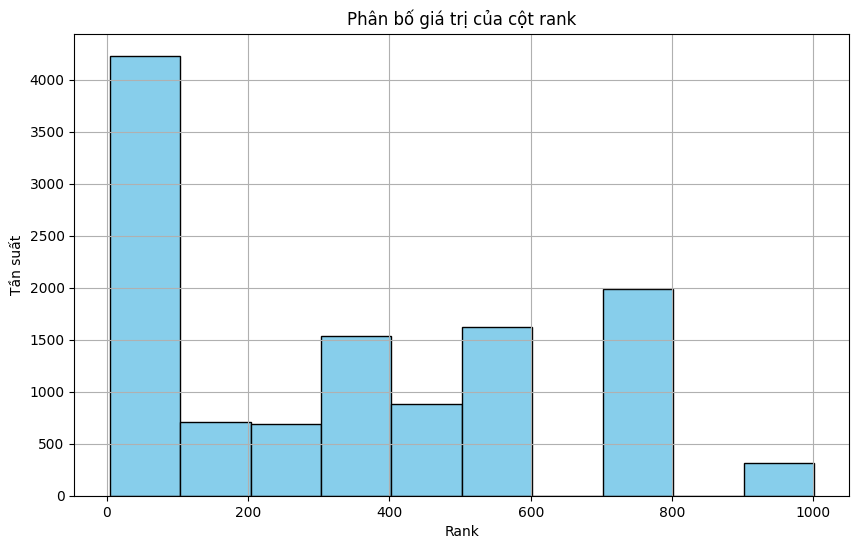

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử df là DataFrame đã được định nghĩa
# Đảm bảo cột 'rank' có kiểu dữ liệu số
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')

# Vẽ biểu đồ histogram cho cột 'rank'
plt.figure(figsize=(10, 6))
plt.hist(df['rank'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Phân bố giá trị của cột rank')
plt.xlabel('Rank')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()